# OLS - Wooldridge Computer Exercise
## Chapter 3, Exercise 10

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/

# Instantiate libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip

from statsmodels.graphics.gofplots import ProbPlot
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Latex markup language 
from IPython.display import Latex

# Data Read from csv

In [3]:
%%time
df1 = pd.read_csv('C://Users//mvrie//Downloads//firepit-master//HTV.csv',sep=',')
print(df1.head())

        wage      abil  educ  ne  nc  west  south  exper  motheduc  fatheduc  \
0  12.019230  5.027738    15   0   0     1      0      9        12        12   
1   8.912656  2.037170    13   1   0     0      0      8        12        10   
2  15.514330  2.475895    15   1   0     0      0     11        12        16   
3  13.333330  3.609240    15   1   0     0      0      6        12        12   
4  11.070110  2.636546    13   1   0     0      0     15        12        15   

   ...  ne18  nc18  south18  west18  urban18    tuit17     tuit18     lwage  \
0  ...     1     0        0       0        1  7.582914   7.260242  2.486508   
1  ...     1     0        0       0        1  8.595144   9.499537  2.187472   
2  ...     1     0        0       0        1  7.311346   7.311346  2.741764   
3  ...     1     0        0       0        1  9.499537  10.162070  2.590267   
4  ...     1     0        0       0        1  7.311346   7.311346  2.404249   

   expersq     ctuit  
0       81 -0.322671 

In [4]:
df1['constant'] = 1

# Data Checks
- Columns

In [5]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 24 columns):
wage        1230 non-null float64
abil        1230 non-null float64
educ        1230 non-null int64
ne          1230 non-null int64
nc          1230 non-null int64
west        1230 non-null int64
south       1230 non-null int64
exper       1230 non-null int64
motheduc    1230 non-null int64
fatheduc    1230 non-null int64
brkhme14    1230 non-null int64
sibs        1230 non-null int64
urban       1230 non-null int64
ne18        1230 non-null int64
nc18        1230 non-null int64
south18     1230 non-null int64
west18      1230 non-null int64
urban18     1230 non-null int64
tuit17      1230 non-null float64
tuit18      1230 non-null float64
lwage       1230 non-null float64
expersq     1230 non-null int64
ctuit       1230 non-null float64
constant    1230 non-null int64
dtypes: float64(6), int64(18)
memory usage: 230.8 KB
Wall time: 7.98 ms


In [7]:
min_ed = np.min(df1['educ'])
max_ed = np.max(df1['educ'])
print("The minimum level of education is: " + str(min_ed))
print("The maximum level of education is: " + str(max_ed))

The minimum level of education is: 6
The maximum level of education is: 20


In [8]:
df_grade12 = df1[df1['educ'] == 12]
totqty = np.sum(df1['constant'])
tot12 = np.sum(df_grade12['constant'])
pct12 = tot12/totqty
print("The total quantity is: " + str(totqty))
print("The number of persons with a 12th grade education is: " + str(tot12))
print("The percentage of persons with a 12th grade education is: " + str(pct12))

The total quantity is: 1230
The number of persons with a 12th grade education is: 512
The percentage of persons with a 12th grade education is: 0.416260162601626


### Estimate: $educ = \alpha + \beta_{1}motheduc + \beta_{2}fatheduc + \mu$

In [12]:
formula = '''educ ~ motheduc + fatheduc
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

               sum_sq      df          F        PR(>F)
motheduc   378.395957     1.0  90.782853  8.234432e-21
fatheduc   303.928839     1.0  72.917077  3.945531e-17
Residual  5114.312074  1227.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           4.13e-77
Time:                        18:17:04   Log-Likelihood:                -2621.7
No. Observations:                1230   AIC:                             5249.
Df Residuals:                    1227   BIC:                             5265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                

### Estimate: $educ = \alpha + \beta_{1}motheduc + \beta_{2}fatheduc + \beta_{3}ability + \mu$

In [13]:
formula = '''educ ~ motheduc + fatheduc + abil
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results2 = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results2, typ=2)
print(aov_table)
print(results2.summary())

               sum_sq      df           F        PR(>F)
motheduc   140.029620     1.0   44.019877  4.865769e-11
fatheduc    99.275064     1.0   31.208227  2.852880e-08
abil      1214.339482     1.0  381.741197  3.183212e-74
Residual  3899.972592  1226.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          5.95e-148
Time:                        18:17:09   Log-Likelihood:                -2455.0
No. Observations:                1230   AIC:                             4918.
Df Residuals:                    1226   BIC:                             4938.
Df Model:                           3                                         
Covarianc

### Estimate: $educ = \alpha + \beta_{1}motheduc + \beta_{2}fatheduc + \beta_{3}ability + \beta_{4}ability^2 + \mu$

In [14]:
df1['abil_sq'] = df1['abil']*df1['abil']
formula = '''educ ~ motheduc + fatheduc + abil + abil_sq
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results3 = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results3, typ=2)
print(aov_table)
print(results3.summary())

               sum_sq      df           F        PR(>F)
motheduc   141.501619     1.0   45.793494  2.031632e-11
fatheduc    95.444202     1.0   30.888152  3.351193e-08
abil       542.900438     1.0  175.696280  1.424984e-37
abil_sq    114.730023     1.0   37.129530  1.478061e-09
Residual  3785.242570  1225.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          1.34e-154
Time:                        18:17:18   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                       

In [15]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([results,results2,results3],stars=True)
print(dfoutput)


            educ I   educ II   educ III
---------------------------------------
Intercept 6.9644*** 8.4487*** 8.2402***
          (0.3198)  (0.2895)  (0.2874) 
abil                0.5025*** 0.4015***
                    (0.0257)  (0.0303) 
abil_sq                       0.0506***
                              (0.0083) 
fatheduc  0.1903*** 0.1111*** 0.1089***
          (0.0223)  (0.0199)  (0.0196) 
motheduc  0.3042*** 0.1891*** 0.1901***
          (0.0319)  (0.0285)  (0.0281) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Multicollinearity checks

In [17]:
# Multicolinearity - Condition Number
np.linalg.cond(results.model.exog)

98.00382614189428

In [19]:
df1.corr(method ='pearson') 

,wage,abil,educ,ne,nc,west,south,exper,motheduc,fatheduc,...,south18,west18,urban18,tuit17,tuit18,lwage,expersq,ctuit,constant,abil_sq
wage,1.000000,0.281766,0.360804,0.098365,-0.063408,0.040738,-0.057443,-0.135202,0.209834,0.220761,...,-0.064404,0.000102,0.035992,0.046118,0.038041,0.863301,-0.135381,-0.045076,NaN,0.179612
abil,0.281766,1.000000,0.594033,0.057079,0.016593,0.043909,-0.110779,-0.445563,0.379892,0.378566,...,-0.107352,-0.001870,0.043662,0.056694,0.051684,0.366225,-0.440519,-0.030628,NaN,0.588544
educ,0.360804,0.594033,1.000000,0.076385,-0.025103,0.057344,-0.093998,-0.684677,0.452367,0.440119,...,-0.100972,-0.032030,0.040386,0.045143,0.042642,0.401943,-0.654553,-0.016892,NaN,0.457147
ne,0.098365,0.057079,0.076385,1.000000,-0.398772,-0.233565,-0.296642,-0.093944,0.039095,0.063317,...,-0.255431,-0.191074,0.082588,0.341346,0.340409,0.121379,-0.092987,-0.037193,NaN,0.050864
nc,-0.063408,0.016593,-0.025103,-0.398772,1.000000,-0.347480,-0.441322,-0.005184,-0.069087,-0.024123,...,-0.368874,-0.289255,0.003626,0.345924,0.352550,-0.057825,-0.017404,0.000464,NaN,0.005918
west,0.040738,0.043909,0.057344,-0.233565,-0.347480,1.000000,-0.258486,-0.044076,0.129504,0.094396,...,-0.187662,0.797923,0.034059,-0.416072,-0.418829,0.023781,-0.049206,0.025696,NaN,-0.011212
south,-0.057443,-0.110779,-0.093998,-0.296642,-0.441322,-0.258486,1.000000,0.133031,-0.072114,-0.114926,...,0.818253,-0.188356,-0.111831,-0.349214,-0.353358,-0.070747,0.150279,0.012354,NaN,-0.045033
exper,-0.135202,-0.445563,-0.684677,-0.093944,-0.005184,-0.044076,0.133031,1.000000,-0.331232,-0.350569,...,0.128106,0.006875,-0.259904,-0.040432,-0.054633,-0.186335,0.981537,-0.067686,NaN,-0.394831
motheduc,0.209834,0.379892,0.452367,0.039095,-0.069087,0.129504,-0.072114,-0.331232,1.000000,0.599051,...,-0.073867,0.089228,0.059813,-0.049769,-0.046503,0.249412,-0.318120,0.021187,NaN,0.226893
fatheduc,0.220761,0.378566,0.440119,0.063317,-0.024123,0.094396,-0.114926,-0.350569,0.599051,1.000000,...,-0.114631,0.034598,0.142902,-0.001200,0.004210,0.273637,-0.342095,0.027360,NaN,0.235954


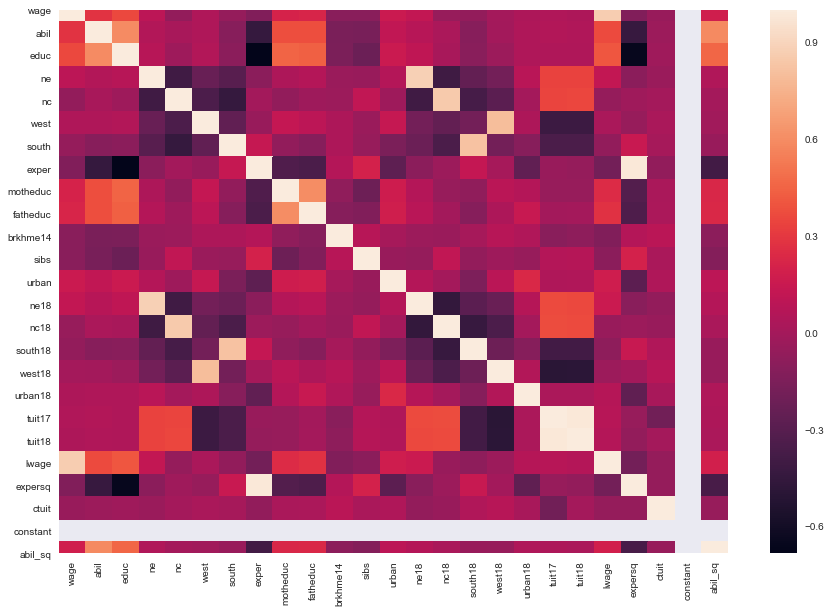

In [20]:
corr = df1.corr(method ='pearson') 
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### VIF

In [22]:
%%capture

# get y and X dataframes based on this regression:
y, X = dmatrices(formula, df1, return_type='dataframe')

In [23]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['mailsyear','giftlast','propresp','avggift'] = X.columns

In [24]:
vif.round(1)

,VIF Factor,"(mailsyear, giftlast, propresp, avggift)"
0,32.9,Intercept
1,1.6,motheduc
2,1.6,fatheduc
3,1.7,abil
4,1.5,abil_sq


### Heteroscedasticity check

In [16]:
print("Heteroscedasticity Test - Breusch Pagan")
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

Heteroscedasticity Test - Breusch Pagan


[('Lagrange multiplier statistic', 3.4100160813162796),
 ('p-value', 0.18177092461162697),
 ('f-value', 1.7055779790439485),
 ('f p-value', 0.18209776899485886)]